<a href="https://colab.research.google.com/github/benisrael29/COMP4702/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

**Q1: Apply the k-means clustering algorithm (as implemented in Matlab or something else if
you prefer) to the heightweight dataset (second and third columns). Plot the resulting
cluster centres together with the data. Colour the data according to class label (first column;
hint: sort the data!) .**

In [79]:
import pandas as pd

url = 'https://raw.githubusercontent.com/benisrael29/COMP4702/main/heightWeightData.csv'

colnames = ['0','1','2']
df = pd.read_csv(url,names=colnames, header= None)
df.drop("0", axis=1, inplace=True)


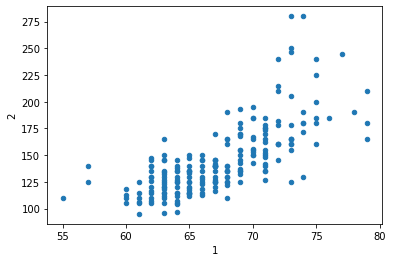

In [80]:
import matplotlib.pyplot as plt

df.plot(x  = '1', y = '2', kind = 'scatter')
plt.show()

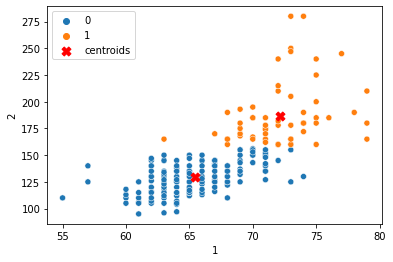

In [81]:
from sklearn.cluster import KMeans
import seaborn as sns

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(df)

sns.scatterplot(data=df, x="1", y="2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

**Q2: In Matlab or python, implement the mean shift clustering algorithm as discussed in
lectures and papers. Hand-in your code for this question. To do this, use a “flat” kernel
function (you will need to specify the value for the radius parameter, λ). You can choose to
implement as either a “blurring” or “non-blurring” process.**

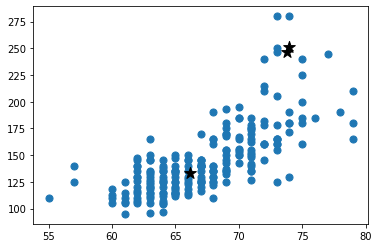

In [82]:
class Mean_Shift:
    def __init__(self, radius=30, radius_norm_step = 100):
        self.radius_norm_step = radius_norm_step
        self.radius = radius

    def fit(self, data):
        centroids = {}

        for i in range(len(data)):
            centroids[i] = data[i]
        
        while True:
            new_centroids = []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                for featureset in data:
                    if np.linalg.norm(featureset-centroid) < self.radius:
                        in_bandwidth.append(featureset)

                new_centroid = np.average(in_bandwidth,axis=0)
                new_centroids.append(tuple(new_centroid))

            uniques = sorted(list(set(new_centroids)))

            prev_centroids = dict(centroids)

            centroids = {}
            for i in range(len(uniques)):
                centroids[i] = np.array(uniques[i])

            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break
                
            if optimized:
                break

        self.centroids = centroids


array = df.to_numpy()
clf = Mean_Shift(radius =35)
clf.fit(array)

centroids = clf.centroids

plt.scatter(array[:,0],array[:,1],s=50)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=150)
plt.show()

**Q3: For each of the datasets ‘d’ and ‘e’ above, run your algorithm with three different,
suitable values of λ.
o Plot the cluster centres over the plot of the data (produced similar to that shown
above), for one of the “typical” run results from your algorithm.
Comment on any variability between results of your runs across different values of
λ.**

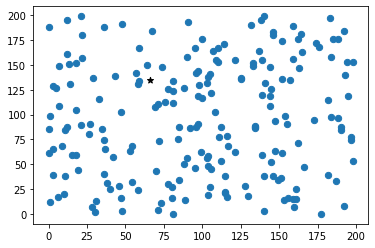

In [83]:
randar = np.random.randint(200, size=(200, 2))
clf = Mean_Shift(radius =38)
clf.fit(array)

centroids = clf.centroids

plt.scatter(randar[:,0],randar[:,1],s=40)

for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color='k', marker='*', s=40)
plt.show()

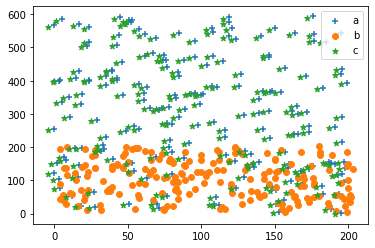

In [84]:
a = np.random.randint(200, size=(200, 2))
b =a + 4
c =a 
c[:,1] = 3*c[:,1]
c = c-4
d = np.concatenate((a,b), axis = 1)
e = np.concatenate((d,c), axis = 1)

plt.scatter(a[:,0],a[:,1],s=35, marker= '+', label = 'a')
plt.scatter(b[:,0],b[:,1],s=35, marker = 'o', label = 'b')
plt.scatter(c[:,0],c[:,1],s=35, marker = '*', label = 'c')
plt.legend()
plt.show()

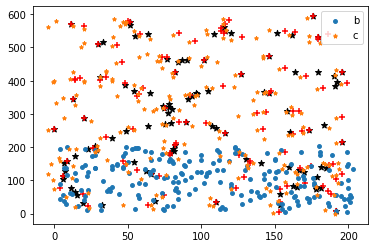

In [85]:
def plot_with_rad( radius = 0):
  rad = radius
  d_clf = Mean_Shift(radius = rad )
  d_clf.fit(d)

  e_clf = Mean_Shift(radius = rad )
  e_clf.fit(e)

  d_centroids = d_clf.centroids
  e_centroids = e_clf.centroids

  for x in d_centroids:
      plt.scatter(d_centroids[x][0], d_centroids[x][1], color='k', marker='*', s=40)

  for y in e_centroids:
      plt.scatter(e_centroids[y][0], e_centroids[y][1], color='r', marker='+', s=40)

  plt.scatter(b[:,0],b[:,1],s=15, marker = 'o', label = 'b')
  plt.scatter(c[:,0],c[:,1],s=15, marker = '*', label = 'c')
  plt.legend()
  plt.show()
  


plot_with_rad(35)

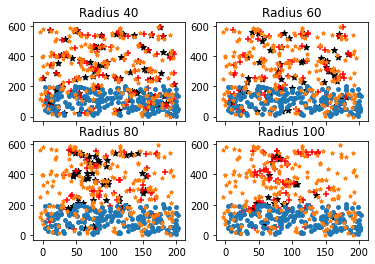

In [86]:
def plot_with_rad(radius = 0, graph = None):
  rad = radius
  d_clf = Mean_Shift(radius = rad )
  d_clf.fit(d)

  e_clf = Mean_Shift(radius = rad )
  e_clf.fit(e)

  d_centroids = d_clf.centroids
  e_centroids = e_clf.centroids

  for x in d_centroids:
      graph.scatter(d_centroids[x][0], d_centroids[x][1], color='k', marker='*', s=40)

  for y in e_centroids:
      graph.scatter(e_centroids[y][0], e_centroids[y][1], color='r', marker='+', s=40)

  graph.scatter(b[:,0],b[:,1],s=15, marker = 'o', label = 'b')
  graph.scatter(c[:,0],c[:,1],s=15, marker = '*', label = 'c')
  graph.set_title('Radius {}'.format(rad))
  

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex =True)

plot_with_rad(40, ax1)
plot_with_rad(60, ax2)
plot_with_rad(80, ax3)
plot_with_rad(100, ax4)

Q3 part 2: There is variability between runs because of the random data set being used. This changes the locations of convergence depending on the given sample. Without a pattern in the data this convergance is itself random. If the data had a pattern we would see more consistent convergence accross data sets. 